In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dev/Chatbot/dp_dataset_min.csv')
df = pd.DataFrame(data)
# Display the first few rows to understand the structure
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scarring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heart attack
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heart attack
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heart attack
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heart attack


Using the Naive base algorithm using the Sci Kit learn Library to train the bot using the dataset

Accuracy on the test set: 1.0000


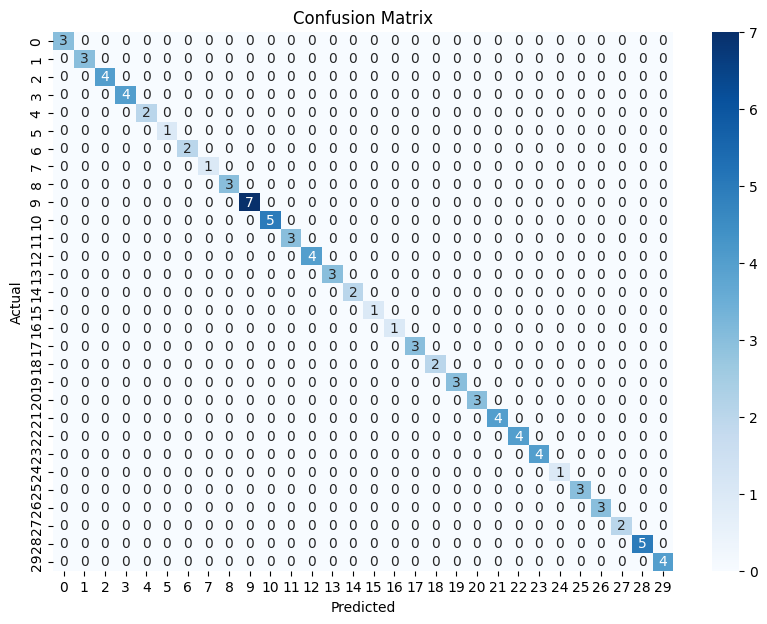

Accuracy on the test set: 1.0000


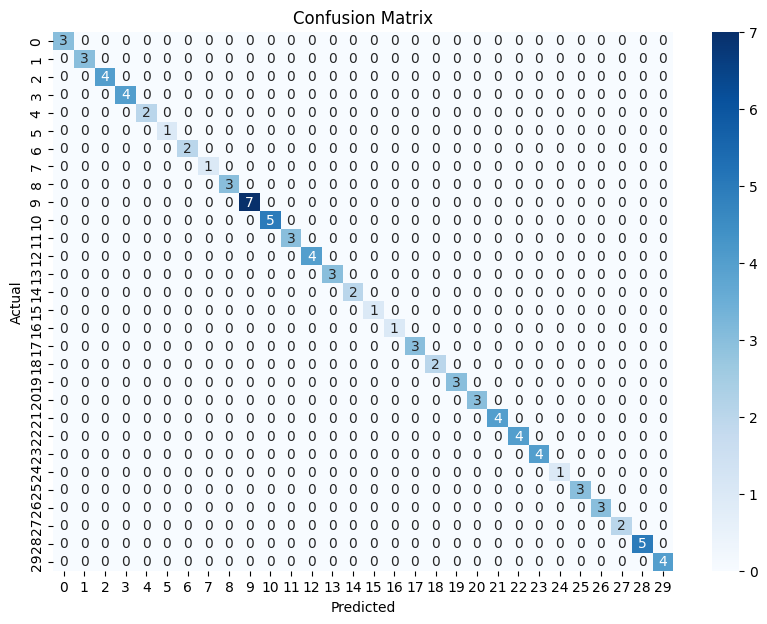

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


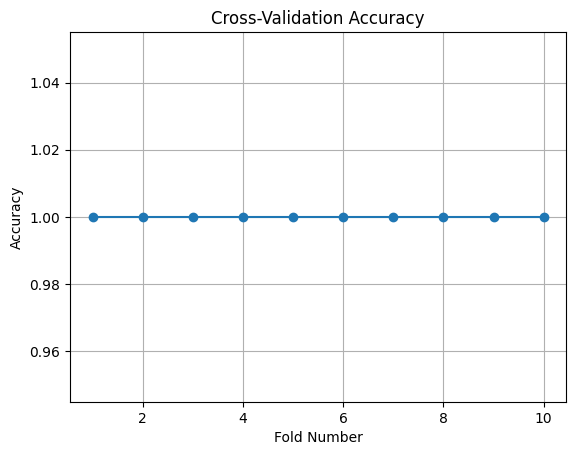

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

class DiseaseCheckerChatbot:
    def __init__(self, data):
        self.df = pd.read_csv(data)
        self.vectorizer = CountVectorizer()
        self.classifier = MultinomialNB()
        self.accuracies = []  # Initialize the accuracies list here
        self.train_model()

    def train_model(self):
        # Combine all symptoms into a single string for each disease
        self.df['symptoms'] = self.df.iloc[:, :-1].apply(lambda row: ' '.join(row.index[row == 1].tolist()), axis=1)

        # Prepare the training data
        X = self.vectorizer.fit_transform(self.df['symptoms'])
        y = self.df['prognosis']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train the classifier
        self.classifier.fit(X_train, y_train)

        # Predict and calculate accuracy on the test set
        y_pred = self.classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        self.accuracies.append(accuracy)
        print(f"Accuracy on the test set: {accuracy:.4f}")

        # Generate and display the confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def visualize_training(self):
        # Cross-validation to get accuracy at each fold
        X = self.vectorizer.fit_transform(self.df['symptoms'])
        y = self.df['prognosis']
        scores = cross_val_score(self.classifier, X, y, cv=10)
        plt.plot(range(1, len(scores) + 1), scores, marker='o')
        plt.title('Cross-Validation Accuracy')
        plt.xlabel('Fold Number')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.show()

# Initialize and run the plot
csv_file_path = '/content/drive/MyDrive/Dev/Chatbot/dp_dataset_min.csv'
chatbot = DiseaseCheckerChatbot(csv_file_path)
chatbot.train_model()
chatbot.visualize_training()

Disease checker logic, still needs a new class that the user can call & use

In [ ]:


    def predict_disease(self, symptoms):
        symptoms_vector = self.vectorizer.transform([symptoms])
        return self.classifier.predict(symptoms_vector)[0]

    def get_top_symptoms(self, n=5):
        # Ensure all columns are treated as numeric
        symptom_data = self.df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
        symptom_counts = symptom_data.sum().sort_values(ascending=False)
        return symptom_counts.head(n).index.tolist()

    def start_chat(self):
        print("Disease Checker chatbot is now ready!")
        print("Hello, I heard you are not feeling well, how can I help you today?")

        user_symptoms = []
        while True:
            top_symptoms = self.get_top_symptoms(5)
            for i, symptom in enumerate(top_symptoms, 1):
                # Show '/' if the symptom has already been selected
                chosen_indicator = "/" if symptom in user_symptoms else ""
                print(f"{i}. I have {symptom.replace('_', ' ')}{chosen_indicator}")
            print("5. View more symptoms")
            if user_symptoms:
                print("6. Check my disease")
            print("7. Exit")

            choice = input("Please enter your choice (1-7): ")

            if choice == '5':
                continue
            elif choice == '6':
                if not user_symptoms:
                    print("Please select at least one symptom before checking for diseases.")
                    continue
                symptoms_str = ' '.join(user_symptoms)
                predicted_disease = self.predict_disease(symptoms_str)
                print(f"Based on your symptoms, you might have: {predicted_disease}")
                print("Please consult a doctor for a proper diagnosis.")
                user_symptoms = []  # Reset for a new session
            elif choice == '7':
                print("Thank you for using the Disease Checker chatbot. Take care!")
                break
            elif choice in ['1', '2', '3', '4']:
                symptom = top_symptoms[int(choice) - 1]
                if symptom not in user_symptoms:
                    user_symptoms.append(symptom)
                    print(f"I understand that you have {symptom.replace('_', ' ')}. Is there anything else?")
                else:
                    print(f"You have already selected {symptom.replace('_', ' ')}.")
            else:
                print("Invalid choice. Please try again.")

Using the chatbot

In [ ]:
# Initialize and run the chatbot
chatbot = DiseaseCheckerChatbot(csv_file_path)
chatbot.start_chat()

NameError: name 'DCBot' is not defined